<a href="https://colab.research.google.com/github/OmarMachuca851/Task/blob/main/scratchSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## problema 1-3: implementación de ScratchSVMClassifier

- Problema 1: Gradient descent utilizando el multiplicador de Larange.
- Problema 2: Determinacion de vectores de soporte.
- Problema 3:implementación de la función predict.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [2]:
import numpy as np
class ScratchSVMClassifier():

    def __init__(self, num_iter=1000, lr=0.001, kernel='linear', threshold=1e-5, degree=3, gamma=1, coef0=1, C=1.0):
        self.num_iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.C = C

    def _linear_kernel(self, X1, X2):
        return np.dot(X1, X2.T)

    def _polynomial_kernel(self, X1, X2):
        return (self.gamma * np.dot(X1, X2.T) + self.coef0) ** self.degree

    def _compute_kernel(self, X1, X2):
        if self.kernel == 'linear':
            return self._linear_kernel(X1, X2)
        elif self.kernel == 'poly':
            return self._polynomial_kernel(X1, X2)
        else:
            raise ValueError(f"Kernel '{self.kernel}' no soportado.")

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.X = X
        self.y = y_
        self.alpha = np.zeros(n_samples)

        # Calculo la matriz kernel
        K = self._compute_kernel(X, X)
        for _ in range(self.num_iter):
            for i in range(n_samples):
                gradient = 1 - y_[i] * np.sum(self.alpha * y_ * K[:, i])
                self.alpha[i] += self.lr * gradient
                self.alpha[i] = np.clip(self.alpha[i], 0, self.C)

        # calculo de los vectores de soporte
        sv = self.alpha > self.threshold
        self.support_vectors_ = X[sv]
        self.support_alpha = self.alpha[sv]
        self.support_y = y_[sv]

        # Calculo bias b
        self.b = np.mean([
            y_[i] - np.sum(self.alpha * y_ * K[:, i])
            for i in range(n_samples) if self.alpha[i] > self.threshold
        ])

    def project(self, X):
        K = self._compute_kernel(X, self.support_vectors_)
        return np.dot(K, self.support_alpha * self.support_y) + self.b

    def predict(self, X):
        return np.sign(self.project(X))

## Problema 4: Estimación y predicción:

como prueba utillizaremos los datos de iris de sklearn

In [3]:
from sklearn.metrics import *

def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test, predict)
    rec_score = recall_score(test, predict)
    f_score = f1_score(test, predict)
    print(f"{'Accuracy:':14}{acc_score}")
    print(f"{'Precision:':14}{prec_score}")
    print(f"{'ReCall:':14}{rec_score}")
    print(f"{'F:':14}{f_score}")

In [4]:
import pandas as pd
from sklearn import datasets
iris_data = datasets.load_iris()

X = pd.DataFrame(iris_data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(iris_data.target, columns=['Species'])

df = pd.concat([X, y], axis=1)

subset = df.loc[(df['Species'] == 0) | (df['Species'] == 1)].reset_index(drop=True)

X = np.array(subset.loc[:, ['sepal_width', 'petal_width']])
y  = np.array(subset['Species'])
y = np.where(y == 0, -1.0, 1.0)
#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1234)

svm_scratch = ScratchSVMClassifier(threshold=1e-2)
svm_scratch.fit(X_train, y_train)
y_predict = svm_scratch.predict(X_test)

In [5]:
print(evaluation(y_predict, y_test))

Accuracy:     1.0
Precision:    1.0
ReCall:       1.0
F:            1.0
None


## Problema 5: Visualizacion de regiones de decisión

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title= 'decision region', xlabel='xlabel', ylabel='ylabel', target_name=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    #pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step), np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    #plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)

    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:,1], s=80, color=scatter_color[i], label=target_name[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_name[i]) for i in range(n_class)]

    for target in model.support_vectors_:
        plt.scatter(target[0], target[1], s=80, color='yellow')

    plt.legend()
    plt.show()

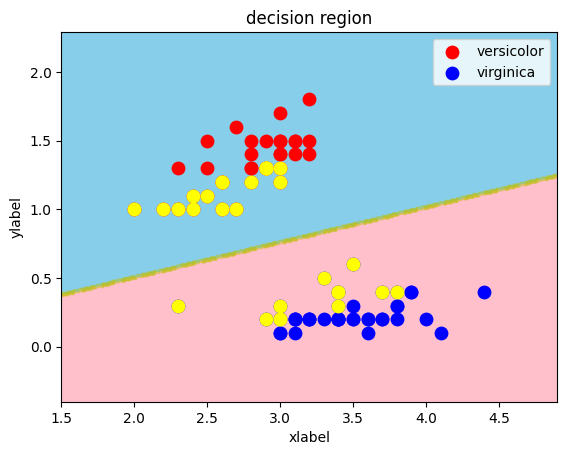

In [7]:
decision_region(X_train, y_train, svm_scratch)

# Problema 6: Creacion de una funcion kernel polinomial

Implementado en:

def _polynomial_kernel(self, X1, X2)

y

def _compute_kernel(self, X1, X2)

In [8]:
from sklearn.datasets import make_moons

# Generamos los datos
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
y = np.where(y == 0, -1, 1)  # Etiquetas: -1 o 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1234)

# Entrenamos SVM con kernel polinómico (grado 3)
svm_scratch_poly = ScratchSVMClassifier(kernel='poly')
svm_scratch_poly.fit(X, y)

# Predecimos
y_pred_poly = svm_scratch_poly.predict(X_test)

In [9]:
evaluation(y_pred_poly, y_test)

Accuracy:     1.0
Precision:    1.0
ReCall:       1.0
F:            1.0


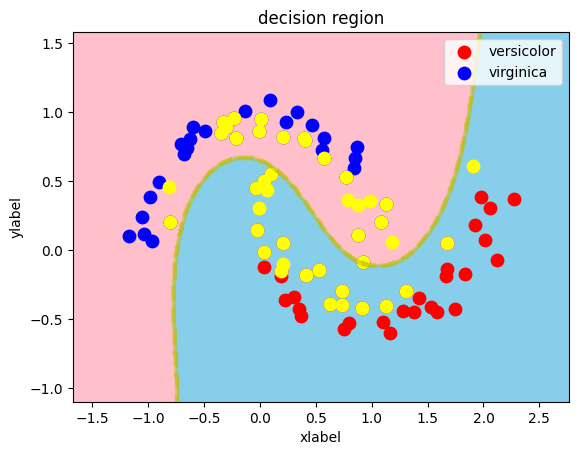

In [10]:
decision_region(X_train, y_train, svm_scratch_poly)